# Survey Notebook for Blog Post

This notebook aims at finding some interesting insights from the StackOverflow Annual Developer Survey of 2017.
It focuses on questions concerning whether developers´ infamous reputation as passionated night-working coders is true or rather an urban legend.

In [35]:
# First of all, import some essential basic libraries like NumPy (for mathematical calculations), 
# Pandas (for dealing with dataframes etc.), Matplotlib or Seaborn (for data visualizations):
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Additionally, import some SciKit learn libraries like the Linear Regression Model:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score#, mean_squared_error

In [36]:
# Now, import the survey results schema file as well as the survery results file itself:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [37]:
# Show some statistics of the survey results´ dataframe:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


In [38]:
# Show top 10 rows:
df.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [39]:
# List all of the columns of the dataframe:
list(df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

## Question 1: Are developeras the typical "9 to 5 workers" or is the clichee of developers that typically sleep out long and prefer to code@night true?

To find an answer to this question, let us first convert the column WorkStart in a suitable format which can easier be sorted.

In [40]:
def convert_daytimes(time):
    '''
    INPUT:
    time - The preferred work start time, using the format of the StackOverflow survey, e.g. '5:00 AM', 'Noon', '3:00 PM'
    
    OUTPUT:
    string - The time in 24h-format "hh:mm", e.g. '05:00', '12:00', '15:00'; NaN values are not converted
    '''
    if (time == 'Midnight'):
        return '00:00'
    elif (time == '1:00 AM'):
        return '01:00'
    elif (time == '2:00 AM'):
        return '02:00'
    elif (time == '3:00 AM'):
        return '03:00'
    elif (time == '4:00 AM'):
        return '04:00'
    elif (time == '5:00 AM'):
        return '05:00'
    elif (time == '6:00 AM'):
        return '06:00'
    elif (time == '7:00 AM'):
        return '07:00'
    elif (time == '8:00 AM'):
        return '08:00'
    elif (time == '9:00 AM'):
        return '09:00'
    elif (time == '10:00 AM'):
        return '10:00'
    elif (time == '11:00 AM'):
        return '11:00'
    elif (time == 'Noon'):
        return '12:00'
    elif (time == '1:00 PM'):
        return '13:00'
    elif (time == '2:00 PM'):
        return '14:00'
    elif (time == '3:00 PM'):
        return '15:00'
    elif (time == '4:00 PM'):
        return '16:00'
    elif (time == '5:00 PM'):
        return '17:00'
    elif (time == '6:00 PM'):
        return '18:00'
    elif (time == '7:00 PM'):
        return '19:00'
    elif (time == '8:00 PM'):
        return '20:00'
    elif (time == '9:00 PM'):
        return '21:00'
    elif (time == '10:00 PM'):
        return '22:00'
    elif (time == '11:00 PM'):
        return '23:00'
    else:
        return np.nan
        
# Add as new column 'WorkStart24' to dataframe:
df['WorkStart24'] = df['WorkStart'].apply(convert_daytimes)

# Print top 20 rows:
print(df[['WorkStart', 'WorkStart24']].head(20))

   WorkStart WorkStart24
0    6:00 AM       06:00
1   10:00 AM       10:00
2    9:00 AM       09:00
3    9:00 AM       09:00
4        NaN         NaN
5   10:00 AM       10:00
6    7:00 AM       07:00
7       Noon       12:00
8    9:00 AM       09:00
9   10:00 AM       10:00
10   6:00 AM       06:00
11       NaN         NaN
12  10:00 AM       10:00
13  10:00 AM       10:00
14   9:00 AM       09:00
15  10:00 AM       10:00
16  10:00 AM       10:00
17  10:00 AM       10:00
18       NaN         NaN
19      Noon       12:00


In [41]:
# Show number of non-null rows:
print(df['WorkStart24'].notnull().sum(), 'non-null rows in column WorkStart24')

13523 non-null rows in column WorkStart24


In [42]:
# Show null rows:
print(df['WorkStart24'].isnull().sum(), 'null (NaN) rows in column WorkStart24')

5579 null (NaN) rows in column WorkStart24


<Axes: title={'center': 'Histogram of Work Starts among Survey Participants'}, xlabel='Time of day (24h format)', ylabel='Developers'>

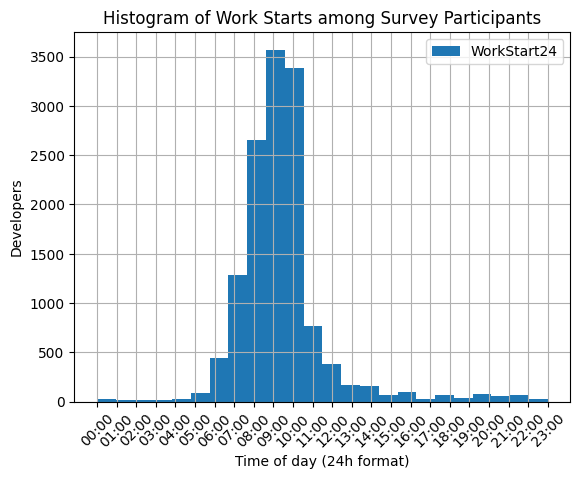

In [43]:
# Print histogram of new column WorkStart24 using converted 24h-format:
plt.title("Histogram of Work Starts among Survey Participants")
plt.xlabel("Time of day (24h format)")
plt.ylabel("Developers")
df['WorkStart24'].sort_values().hist(bins=24, xlabelsize=10, xrot=45, legend='Persons that start work at this time of day', cumulative=False)

In [44]:
# Count highest number of rows at 09:00 (see histogram):
df[df['WorkStart24'] == '09:00']['WorkStart24'].count()

3570

In [45]:
# Count percentage of highest number of rows at 09:00 (see histogram):
print(np.round(100 * df[df['WorkStart24'] == '09:00']['WorkStart24'].count()/df['WorkStart24'].notnull().sum(), 1),"% would prefer to start at 09:00am")

26.4 % would prefer to start at 09:00am


In [46]:
# Count 2nd highest number of rows at 10:00 (see histogram):
df[df['WorkStart24'] == '10:00']['WorkStart24'].count()

3380

In [47]:
# Count percentage of 2nd highest number of rows at 10:00 (see histogram):
print(np.round(100 * df[df['WorkStart24'] == '10:00']['WorkStart24'].count()/df['WorkStart24'].notnull().sum(), 1),"% would prefer to start at 10:00am")

25.0 % would prefer to start at 10:00am


In [48]:
# Count percentage of summarized number of rows at unconventional start times, i.e. between 01:00pm and 05:00am:
print(np.round(100 * (df['WorkStart24'].notnull().sum() - 
            (df[df['WorkStart24'] == '06:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '07:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '08:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '09:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '10:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '11:00']['WorkStart24'].count() 
           + df[df['WorkStart24'] == '12:00']['WorkStart24'].count()))/df['WorkStart24'].notnull().sum(), 1)
      ,"% would prefer to start work between 01:00pm and 05:00am")

7.6 % would prefer to start work between 01:00pm and 05:00am


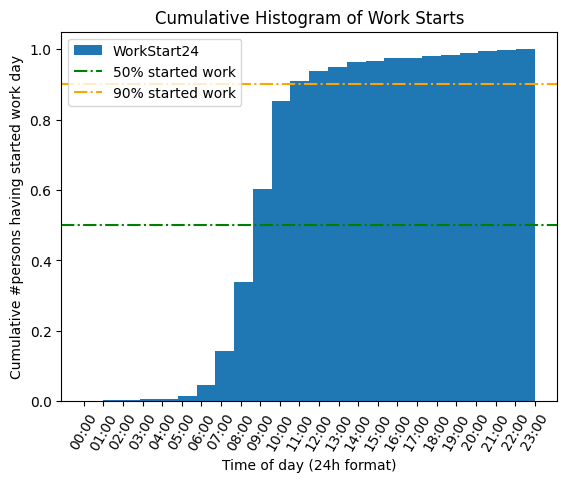

In [49]:
# Plotting labelled cumulative histogram:
df['WorkStart24'].sort_values().hist(bins=24, xlabelsize=10, xrot=60, legend='Persons that start work at this time of day', cumulative=True, density=True)
plt.xlabel('Time of day (24h format)')
plt.ylabel('Cumulative #persons having started work day')
plt.xticks(np.arange(0, 24, step=1))
plt.axhline(y=0.5, label='50% started work', linestyle='-.', color='g')
plt.axhline(y=0.9, label='90% started work', linestyle='-.', color='orange')
plt.legend()
plt.title("Cumulative Histogram of Work Starts")
plt.grid()
plt.show()

In [50]:
# Show sorted WorkStart values and their value counts:
df['WorkStart24'].value_counts().sort_index()

00:00      23
01:00      17
02:00      12
03:00      18
04:00      31
05:00      92
06:00     447
07:00    1282
08:00    2658
09:00    3570
10:00    3380
11:00     772
12:00     385
13:00     165
14:00     160
15:00      65
16:00      94
17:00      28
18:00      67
19:00      38
20:00      79
21:00      52
22:00      64
23:00      24
Name: WorkStart24, dtype: int64

### How to deal with missing values in the WorkStart24 column?

Missing values (also known as "nulls" or "NaNs") typically represent a problem for data scientists.
Generally, there exist several options how to deal with them, amongst them the most frequently used are:
- Drop the respective rows or columns
- Impute missing values (e.g., using the mean or the mode of the values, depending on the type, i.e. if it is a numerical or a categorical value)

Here, the WorkStart24 column represents a categorical column with 24 different values (the hours of the day). As seen above, there are 5579 out of 19102 rows with a missing value in this column, meaning that only 70% of the survey participants answered this question.

Here, imputing missing values would significantly falsify the results, since this would mean that 30% of the values would manually be created, e.g. by the mean (which would be 09:21 am, see below) or the mode (which would be 09:00 am), while the results are widely spreat among the 24 different options.

Because of this, I decided to ignore those participants which did not answer this question, i.e., removing their data by dropping the respective rows with null/NaNs values, which is done in the following cell.

In [52]:
# Drop nulls in WorkStart24 column, as they do not add any relevant information needed for these observations:
df = df.dropna(subset=['WorkStart24'], axis=0)

In [53]:
# Calculate the mean WorkStart, in format (h)h:mm:
ws_calc = 0
for ws in df['WorkStart24']:
    #print(ws[:2])
    ws_calc += int(ws[:2])
ws_calc = ws_calc/len(df['WorkStart24'])
meanTime = np.divmod(ws_calc, int(ws_calc))
meanHHMM = str(int(ws_calc))+":"+str(int(meanTime[1]*60))
print("The mean Work Start is at",meanHHMM) # mean: 09:21

The mean Work Start is at 9:21


In [54]:
# One-hot encode WorkStart24 to have 24 different one-hot encoded columns for every hour:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variable(s) you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

# Do One-hot encoding of WorkStart24 column; drop null rows of WorkStart24, as they are not relevant for the further investigations:
df = create_dummy_df(df, ['WorkStart24'], False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13523 entries, 0 to 19100
Columns: 178 entries, Respondent to WorkStart24_23:00
dtypes: float64(6), int64(1), object(147), uint8(24)
memory usage: 16.3+ MB


In [55]:
# As a check, list all columns to see if one-hot encoded worked correctly:
list(df.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [56]:
# Create new dataframe df_ws24 with significantly reduced columns, only involving satisfactions, salary and one-hot encoded WorkStart columns:
df_ws24 = df.drop(columns=['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 #'CareerSatisfaction',
 #'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances',
 'ImportantBenefits',
 'ClickyKeys',
 'JobProfile',
 'ResumePrompted',
 'LearnedHiring',
 'ImportantHiringAlgorithms',
 'ImportantHiringTechExp',
 'ImportantHiringCommunication',
 'ImportantHiringOpenSource',
 'ImportantHiringPMExp',
 'ImportantHiringCompanies',
 'ImportantHiringTitles',
 'ImportantHiringEducation',
 'ImportantHiringRep',
 'ImportantHiringGettingThingsDone',
 'Currency',
 'Overpaid',
 'TabsSpaces',
 'EducationImportant',
 'EducationTypes',
 'SelfTaughtTypes',
 'TimeAfterBootcamp',
 'CousinEducation',
 'WorkStart',
 'HaveWorkedLanguage',
 'WantWorkLanguage',
 'HaveWorkedFramework',
 'WantWorkFramework',
 'HaveWorkedDatabase',
 'WantWorkDatabase',
 'HaveWorkedPlatform',
 'WantWorkPlatform',
 'IDE',
 'AuditoryEnvironment',
 'Methodology',
 'VersionControl',
 'CheckInCode',
 'ShipIt',
 'OtherPeoplesCode',
 'ProjectManagement',
 'EnjoyDebugging',
 'InTheZone',
 'DifficultCommunication',
 'CollaborateRemote',
 'MetricAssess',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedStorage',
 'EquipmentSatisfiedRW',
 'InfluenceInternet',
 'InfluenceWorkstation',
 'InfluenceHardware',
 'InfluenceServers',
 'InfluenceTechStack',
 'InfluenceDeptTech',
 'InfluenceVizTools',
 'InfluenceDatabase',
 'InfluenceCloud',
 'InfluenceConsultants',
 'InfluenceRecruitment',
 'InfluenceCommunication',
 'StackOverflowDescribes',
 #'StackOverflowSatisfaction',
 'StackOverflowDevices',
 'StackOverflowFoundAnswer',
 'StackOverflowCopiedCode',
 'StackOverflowJobListing',
 'StackOverflowCompanyPage',
 'StackOverflowJobSearch',
 'StackOverflowNewQuestion',
 'StackOverflowAnswer',
 'StackOverflowMetaChat',
 'StackOverflowAdsRelevant',
 'StackOverflowAdsDistracting',
 'StackOverflowModeration',
 'StackOverflowCommunity',
 'StackOverflowHelpful',
 'StackOverflowBetter',
 'StackOverflowWhatDo',
 'StackOverflowMakeMoney',
 'Gender',
 'HighestEducationParents',
 'Race',
 'SurveyLong',
 'QuestionsInteresting',
 'QuestionsConfusing',
 'InterestedAnswers',
 #'Salary',
 'ExpectedSalary'], axis=0)

### How to deal with missing values in the satisfaction & salary columns?

Same as before for the WorkStart24 column, we have to decide how to deal with missing values (nulls or NaNs) in the columns which are additionally regarded to answer the following Question 2.

To be able to draw a consistent picture of the satisfaction and salary, it is essential that either all of the 4 values are provided _or_ the row is completely disregarded (i.e., dropped) since incomplete data with less than 4 of 4 values would falsify the results.

For the salary, we decided to drop the nulls, since the salaries are widely spreat between values of 0 and up to 195k, as you can infer from the following cell. There, taking e.g. the mean would definitely not make sense.

Regarding the 3 numerical satisfaction columns (CareerSatisfaction, JobSatisfaction, StackOverflowSatisfaction), it can be seen that imputing the mean of the column values could be a useful proceeding, since the range of all 3 columns is fixed and the same (integer values between 0 and 10), i.e. they actually represent categorical numeric columns. 

In [57]:
print('Max salary:',df_ws24['Salary'].max(),', Min salary:',df_ws24['Salary'].min(),', Mean salary:',df_ws24['Salary'].mean())

Max salary: 195000.0 , Min salary: 0.0 , Mean salary: 59192.17114797075


In [58]:
# Drop NaN rows of the salary columns:
df_ws24 = df_ws24.dropna(subset=['Salary'], axis=0)

In [59]:
print('StackOverflowSatisfaction: Max=',df_ws24['StackOverflowSatisfaction'].max(),', Min=',df_ws24['StackOverflowSatisfaction'].min(),', Mean=',df_ws24['StackOverflowSatisfaction'].mean())
print('CareerSatisfaction: Max=',df_ws24['CareerSatisfaction'].max(),', Min=',df_ws24['CareerSatisfaction'].min(),', Mean=',df_ws24['CareerSatisfaction'].mean())
print('JobSatisfaction: Max=',df_ws24['JobSatisfaction'].max(),', Min=',df_ws24['JobSatisfaction'].min(),', Mean=',df_ws24['JobSatisfaction'].mean())


StackOverflowSatisfaction: Max= 10.0 , Min= 0.0 , Mean= 8.442615851017756
CareerSatisfaction: Max= 10.0 , Min= 0.0 , Mean= 7.546981292517007
JobSatisfaction: Max= 10.0 , Min= 0.0 , Mean= 7.037438842799404


In [60]:
# Fill missing values in satisfaction columns by the column means:
fill_mean = lambda col: col.fillna(col.mean())

df_ws24 = df_ws24.apply(fill_mean, axis=0)

In [61]:
# Show info of reduced df_ws24 dataset:
df_ws24.describe()

,CareerSatisfaction,JobSatisfaction,StackOverflowSatisfaction,Salary,WorkStart24_00:00,WorkStart24_01:00,WorkStart24_02:00,WorkStart24_03:00,WorkStart24_04:00,WorkStart24_05:00,...,WorkStart24_14:00,WorkStart24_15:00,WorkStart24_16:00,WorkStart24_17:00,WorkStart24_18:00,WorkStart24_19:00,WorkStart24_20:00,WorkStart24_21:00,WorkStart24_22:00,WorkStart24_23:00
count,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,...,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000,4714.000000
mean,7.546981,7.037439,8.442616,59192.171148,0.000636,0.000636,0.000424,0.001061,0.001697,0.006576,...,0.010607,0.002546,0.003394,0.001909,0.003818,0.002121,0.004031,0.002333,0.003394,0.000849
std,1.681871,2.056667,1.327482,40670.025691,0.025222,0.025222,0.020596,0.032554,0.041165,0.080835,...,0.102452,0.050395,0.058167,0.043657,0.061682,0.046014,0.063365,0.048255,0.058167,0.029120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,6.000000,8.000000,29278.565923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,7.000000,8.442616,52500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,8.000000,9.000000,85000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,195000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Question 2: Is there a influence between the time a developer starts to work and his or her satisfactions and salary?

To find an answer to this question, take a closer look at the heatmap of the reduced df_ws24 dataset.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 [Text(0.5, 1, 'CareerSatisfaction'),
  Text(1.5, 1, 'JobSatisfaction'),
  Text(2.5, 1, 'StackOverflowSatisfaction'),
  Text(3.5, 1, 'Salary'),
  Text(4.5, 1, 'WorkStart24_00:00'),
  Text(5.5, 1, 'WorkStart24_01:00'),
  Text(6.5, 1, 'WorkStart24_02:00'),
  Text(7.5, 1, 'WorkStart24_03:00'),
  Text(8.5, 1, 'WorkStart24_04:00'),
  Text(9.5, 1, 'WorkStart24_05:00'),
  Text(10.5, 1, 'WorkStart24_06:00'),
  Text(11.5, 1, 'WorkStart24_07:00'),
  Text(12.5, 1, 'WorkStart24_08:00'),
  Text(13.5, 1, 'WorkStart24_09:00'),
  Text(14.5, 1, 'WorkStart24_10:00'),
  Text(15.5, 1, 'WorkStart24_11:00'),
  Text(16.5, 1, 'WorkStart24_12:00'),
  Text(17.5, 1, 'WorkStart24_13:00'),
  Text(18.5, 1, 'WorkStart24_14:00'),
  Text(19.5, 1, 'WorkStart24_15:00'),
  Text(20.5, 1, 'WorkStart24_16:00'),
  Text(21.5, 1, 'WorkS

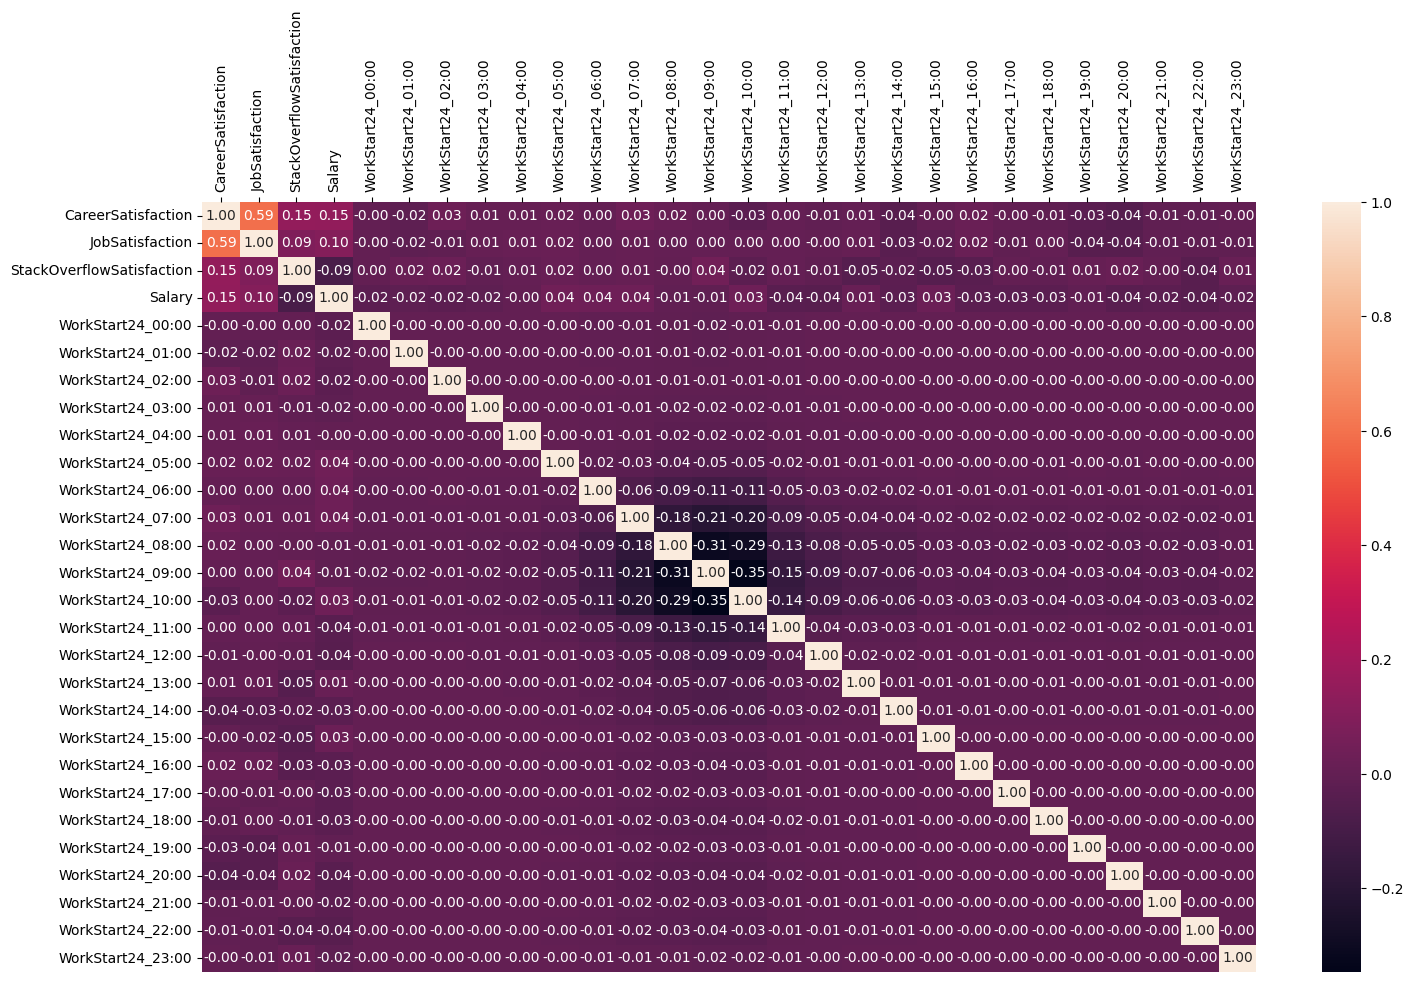

In [62]:
# Print heatmap of one-hot encoded WorkStart24:
plt.figure(figsize=(17, 10))
ax = sns.heatmap(df_ws24.corr(), annot=True, fmt=".2f");#, cmap="crest");
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90) 

## Question 3: Is there a difference in the expected Salary based on the time a developer typically starts to work?

Use a simple LinearRegression model of SciKit learn to predict salaries solely based on the preferred Work Starts of the survey participants.

In [63]:
#Split into explanatory and response variables
X = df_ws24.drop(['CareerSatisfaction', 'JobSatisfaction', 'StackOverflowSatisfaction', 'Salary'], axis=1)
y = df_ws24['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=8)

lm_model = LinearRegression() # Instantiate Linear Regression Model
lm_model.fit(X_train.values, y_train.values) #Fit training data to model

#Predict using your model
y_test_preds = lm_model.predict(X_test.values)
y_train_preds = lm_model.predict(X_train.values)

#Score using your model
test_score = np.abs(r2_score(y_test, y_test_preds))
train_score = np.abs(r2_score(y_train, y_train_preds))

#Print training and testing score
print("The rsquared on the training data was {}.\nThe rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.020690379573918283.
The rsquared on the test data was 0.005032807910819503.


In [64]:
# Predict Salary for different WorkStart hours (00:00 AM to 11:00 PM, one-hot encoded):
pred_sal_ws24 = []
pred_sal_ws24.append(lm_model.predict([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]]))
pred_sal_ws24.append(lm_model.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]))
print('Predictions for WorkStarts:\n')
pred_sal_ws24

Predictions for WorkStarts:



[array([21232.]),
 array([30160.]),
 array([17984.]),
 array([34672.]),
 array([41616.]),
 array([81952.]),
 array([70320.]),
 array([63680.]),
 array([58672.]),
 array([58752.]),
 array([61456.]),
 array([54112.]),
 array([47664.]),
 array([58704.]),
 array([42880.]),
 array([73248.]),
 array([35568.]),
 array([44496.]),
 array([41424.]),
 array([55424.]),
 array([34480.]),
 array([53600.]),
 array([32560.]),
 array([5504.])]

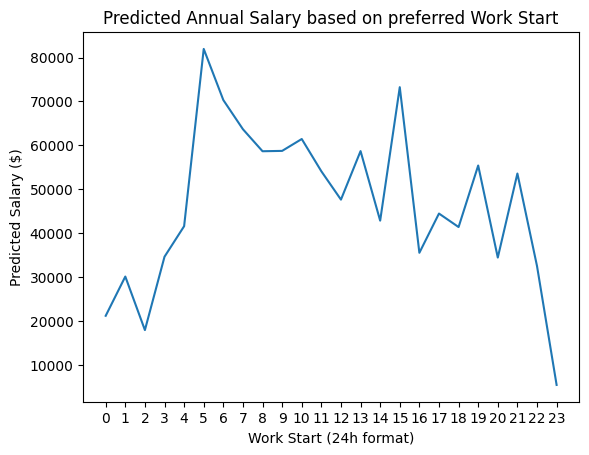

In [65]:
# Plot predicted salaries based on preferred Work Start hours:
plt.plot(pred_sal_ws24)
plt.title('Predicted Annual Salary based on preferred Work Start')
plt.xlabel('Work Start (24h format)')
plt.xticks(np.arange(0, 24))
plt.ylabel('Predicted Salary ($)')
plt.show()

In [66]:
# Calculate the difference (in %) between the highest and lowest predicted salaries:
print("Difference between highest and lowest predicted value is",np.round(100*(81952/5504), 1),"%")

Difference between highest and lowest predicted value is 1489.0 %
